Import Pandas

In [2]:
import pandas as pd #import pandas

Read Dataset

In [3]:
df = pd.read_csv("Data/Task2/diabetes.csv") #read csv dataset to df
df.head() #project df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Change 0 values of BloodPressure, SkinThickness and BMI to Null

In [4]:
df2 = df.copy() #copy df to save old one
df2['BloodPressure'].replace(to_replace = 0, value = 'Null', inplace = True) #replacing 0 values in Bloodpressure with Null
df2['SkinThickness'].replace(to_replace = 0, value = 'Null', inplace = True) #replacing 0 values in SkinThickness with Null
df2['BMI'].replace(to_replace = 0, value = 'Null', inplace = True) #replacing 0 values in BMI with Null
df2


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,Null,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,Null,0,30.1,0.349,47,1


Remove Outcome column and one of the columns if correlation value with the other column > 0.5

In [5]:
df3 = df.copy() #copy df to save old one
df3 = df3.drop(columns = 'Outcome') #drop Outcome column

def removeColumn(df): #funtion to remove column if correlation value with other > 0.5
    for column in df.columns:
        for column2 in df.columns:
            if column != column2:
                corr = df[column].corr(df[column2])
                if corr > 0.5:
                    df = df.drop(columns = column)
    return df

In [6]:
removeColumn(df3) #run function on dataset


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63
764,122,70,27,0,36.8,0.340,27
765,121,72,23,112,26.2,0.245,30
766,126,60,0,0,30.1,0.349,47


Projecting data on first and second PC's as a scatterplot

In [7]:
from sklearn.decomposition import PCA #import library
from sklearn.preprocessing import StandardScaler

In [8]:
# PCA is effected by scale so values have to be standardized
#features of dataset
features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'] 
#only features
x = df.loc[:, features].values
#only target
y = df.loc[:,['Outcome']]
# features standardixed
x = StandardScaler().fit_transform(x)
x

array([[ 0.84832379,  0.14964075,  0.90726993, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-1.12339636, -0.16054575,  0.53090156, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.94372388, -0.26394125, -1.28821221, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.00330087,  0.14964075,  0.15453319, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [ 0.1597866 , -0.47073225, -1.28821221, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.8730192 ,  0.04624525,  0.65635768, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [9]:
pca = PCA(n_components = 2) #to project on first and second principal components
pcs = pca.fit_transform(x)
pcsDF = pd.DataFrame(data = pcs, columns = ['PC1', 'PC2'])

          PC1       PC2  Outcome
0    0.879480  1.142083        1
1   -0.985500 -0.589810        0
2   -0.642791  1.204830        1
3   -0.914217 -1.151614        0
4    2.662910 -1.508009        1
..        ...       ...      ...
763  1.210706  0.915681        0
764  0.004620 -0.330199        0
765 -0.313074 -0.175631        0
766 -1.101898  1.461383        1
767 -0.653960 -0.972073        0

[768 rows x 3 columns]


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

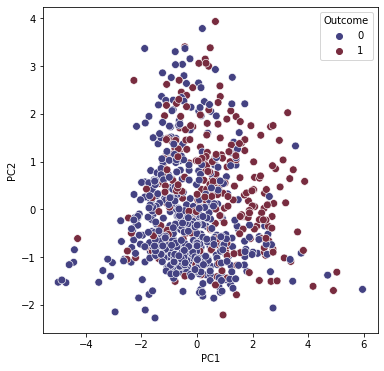

In [10]:
pcsDF = pd.concat([pcsDF , pd.DataFrame(y)] , axis = 1) #add target to df 

import seaborn as sb #import library for visualization
import matplotlib.pyplot as plt #import library for plot 
print(pcsDF)
plt.figure(figsize = (6,6))
sb.scatterplot(data = pcsDF , x = 'PC1',y = 'PC2' , hue = 'Outcome', s = 60 , palette= 'icefire')
